In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
df = pd.read_excel('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/staging-paramaters/finished_staging_experiments/pupae_counting_staging.xlsx', '12.02 pupa')

Net Loss Overall Per Day:

In [11]:

# Find the Mean of each Net Loss Column 
# Average Net Loss per vile Accross the Week 

average_monday_loss = np.mean(df['Monday Net Loss'])

average_tuesday_loss = np.mean(df['Tuesday Net Loss'])

average_wednesday_loss = np.mean(df['Wednesday Net Loss'])

average_thursday_loss = np.mean(df['Thursday Net Loss'])

average_friday_loss = np.mean(df['Friday Net Loss'])


dict_average_loss = { 'Monday': [average_monday_loss], 'Tuesday': [average_tuesday_loss], 'Wednesday': [average_wednesday_loss], 'Thursday': [average_thursday_loss], 'Friday': [average_friday_loss]}


df_average_loss = pd.DataFrame.from_dict(dict_average_loss)


df_average_loss


TypeError: unsupported operand type(s) for +: 'int' and 'str'

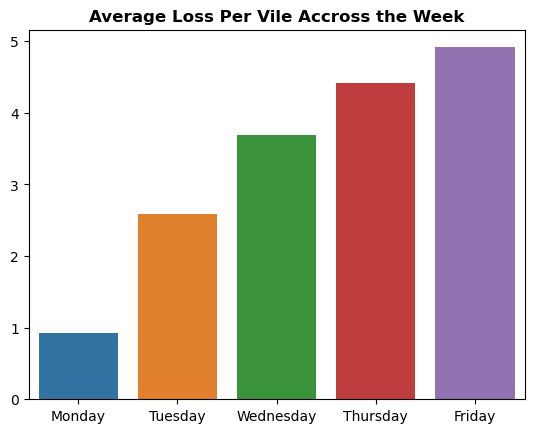

In [52]:
sns.barplot(df_average_loss)
plt.title('Average Loss Per Vile Accross the Week', fontweight='bold')

plt.savefig('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/analysis/pupa_plot_figures/Average_Loss_per_vile.png', dpi=300, format='png')

/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging
plt.show()

In [54]:
# Caclulate the Total Loss Per Day 

monday_total_loss = 35

tuesday_total_loss = 61 

wednesday_total_loss = 38

thursday_total_loss = 26

friday_total_loss = 18

dict_total_loss = { 'Monday': [monday_total_loss], 'Tuesday': [tuesday_total_loss], 'Wednesday': [wednesday_total_loss], 'Thursday': [thursday_total_loss], 'Friday': [friday_total_loss]}


df_total_loss = pd.DataFrame.from_dict(dict_total_loss)


df_total_loss



,Monday,Tuesday,Wednesday,Thursday,Friday
0,35,61,38,26,18


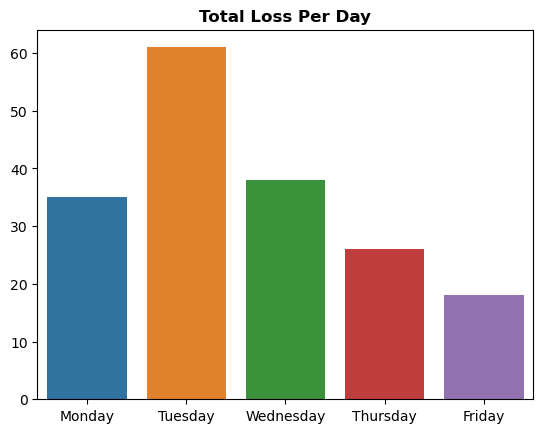

In [55]:
sns.barplot(df_total_loss)
plt.title('Total Loss Per Day', fontweight='bold')

plt.savefig('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/analysis/pupa_plot_figures/Total_loss_each_day.png', dpi=300, format='png')
plt.show()

In [56]:
# Calculate the Average loss per day of staging (above is average net loss per vile over the week)

monday_avg_loss = 35 / 38

tuesday_avg_loss = 61 / 37

wednesday_avg_loss = 38 / 36

thursday_avg_loss = 26 / 36

friday_avg_loss = 18 / 36

### Net Loss Per Day As Day Collected

In [57]:

# on the bottom want monday-friday 
# but then want 5 bars each day with the total loss from each 

# long format i presume but need to chose columns i want first 


columns = ['Vile_Code', 'Monday Net Loss', 'Tuesday Net Loss', 'Wednesday Net Loss', 'Thursday Net Loss', 'Friday Net Loss']

df_columns = df[columns]

df_new_melted = pd.melt(df_columns, id_vars=['Vile_Code'], var_name='Day', value_name='Net Loss')

df_new_melted['Day_Group'] = df_new_melted['Vile_Code'].str.extract('(MON|TUE|WED|THUR|FRI)')

df_new_melted




,Vile_Code,Day,Net Loss,Day_Group
0,MON_PM_1,Monday Net Loss,0.0,MON
1,MON_PM_2,Monday Net Loss,0.0,MON
2,MON_PM_3,Monday Net Loss,0.0,MON
3,TUE_AM_1,Monday Net Loss,0.0,TUE
4,TUE_AM_2,Monday Net Loss,0.0,TUE
...,...,...,...,...
200,FRI_AM_3,Friday Net Loss,10.0,FRI
201,FRI_AM_4,Friday Net Loss,14.0,FRI
202,NaN,Friday Net Loss,NaN,NaN
203,NaN,Friday Net Loss,NaN,NaN


In [58]:


total = []


for day in df_new_melted['Day'].unique():

    for group in df_new_melted['Day_Group'].unique():

        # Filter the DataFrame for the current day and group, then sum the 'Net Loss'
        # need to practise extraction from columns etc - chatgpt did this

        total_loss = np.sum(df_new_melted[(df_new_melted['Day'] == day) & (df_new_melted['Day_Group'] == group)]['Net Loss'])

        total.append((day, group, total_loss))  # Append a tuple with the day, group, and total loss


        
total_by_day = pd.DataFrame(total, columns=['Day of Staging', 'Day Collected', 'Total_Loss'])

total_by_day



,Day of Staging,Day Collected,Total_Loss
0,Monday Net Loss,MON,0.0
1,Monday Net Loss,TUE,4.0
2,Monday Net Loss,WED,13.0
3,Monday Net Loss,THUR,9.0
4,Monday Net Loss,FRI,9.0
5,Monday Net Loss,NaN,0.0
6,Tuesday Net Loss,MON,1.0
7,Tuesday Net Loss,TUE,9.0
8,Tuesday Net Loss,WED,35.0
9,Tuesday Net Loss,THUR,32.0


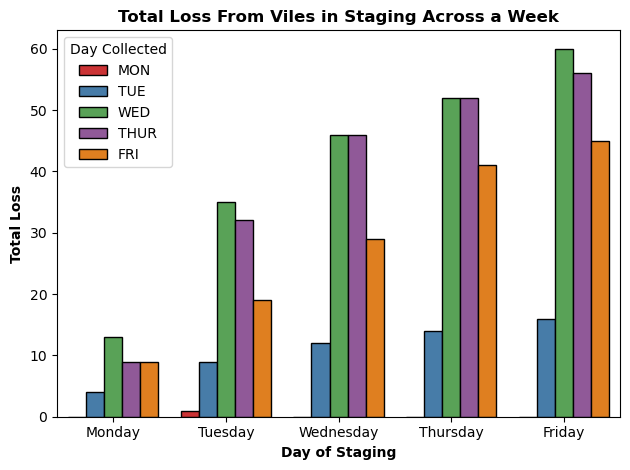

In [61]:

sns.barplot(x='Day of Staging', y='Total_Loss', data=total_by_day, hue='Day Collected', edgecolor='black', palette='Set1')

plt.ylabel('Total Loss', fontweight='bold')
plt.xlabel('Day of Staging', fontweight='bold')

plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])


plt.title('Total Loss From Viles in Staging Across a Week', fontweight='bold')

plt.savefig('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/analysis/pupa_plot_figures/Total_loss_day_collected.png', dpi=300, format='png')

plt.tight_layout()



In [63]:
average = []


for day in df_new_melted['Day'].unique():

    for group in df_new_melted['Day_Group'].unique():

        # Filter the DataFrame for the current day and group, then sum the 'Net Loss'
        # need to practise extraction from columns etc - chatgpt did this

        total_loss = np.sum(df_new_melted[(df_new_melted['Day'] == day) & (df_new_melted['Day_Group'] == group)]['Net Loss'])

        mean_loss = total_loss / len(df_new_melted[(df_new_melted['Day'] == day) & (df_new_melted['Day_Group'] == group)]['Net Loss'])



        average.append((day, group, mean_loss))  # Append a tuple with the day, group, and total loss

        
average_by_day = pd.DataFrame(average, columns=['Day of Staging', 'Day Collected', 'Total_Loss'])

average_by_day

/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_2292/3895152563.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mean_loss = total_loss / len(df_new_melted[(df_new_melted['Day'] == day) & (df_new_melted['Day_Group'] == group)]['Net Loss'])


,Day of Staging,Day Collected,Total_Loss
0,Monday Net Loss,MON,0.000000
1,Monday Net Loss,TUE,0.400000
2,Monday Net Loss,WED,1.181818
3,Monday Net Loss,THUR,0.900000
4,Monday Net Loss,FRI,2.250000
5,Monday Net Loss,NaN,NaN
6,Tuesday Net Loss,MON,0.333333
7,Tuesday Net Loss,TUE,0.900000
8,Tuesday Net Loss,WED,3.181818
9,Tuesday Net Loss,THUR,3.200000


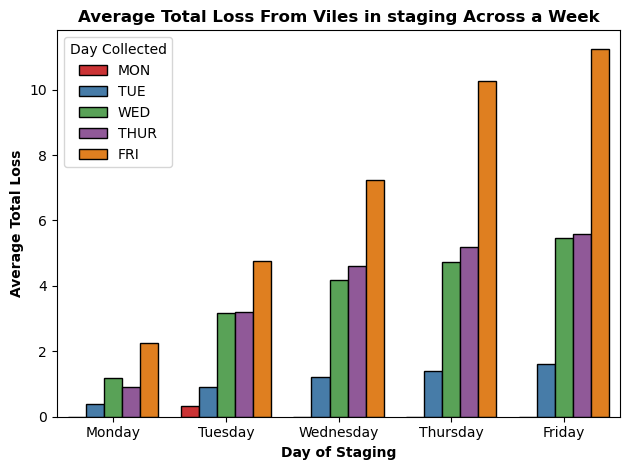

In [64]:
sns.barplot(x='Day of Staging', y='Total_Loss', data=average_by_day, hue='Day Collected', edgecolor='black', palette='Set1')

plt.ylabel('Average Total Loss', fontweight='bold')
plt.xlabel('Day of Staging', fontweight='bold')

plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])


plt.title('Average Total Loss From Viles in staging Across a Week', fontweight='bold')
plt.savefig('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/analysis/pupa_plot_figures/Average_loss_day_collected.png', dpi=300, format='png')

plt.tight_layout()

### Monday C02 and Stage for Hole Presence Y//N

In [2]:
# sorted on monday 8.30 to 11.30 and staged immedietly following; thus, co2 will impact the ability of flies to produce eggs 

# columns Sorting_Order_12/02 and day4_holes_1PM

# x axis sorting order but with Vile_Code 
# y axis Y/N but put as 1/0 

plt.plot(df['Vile_Code'], df['day4_holes_1PM'], color='green')

plt.gca().invert_yaxis()


plt.xticks(rotation=90)

plt.ylabel('Day 4 holes')
plt.xlabel('Vile Code')

plt.title('C02 exposure and Presence of Holes', fontweight='bold')

plt.tight_layout()

plt.show()




NameError: name 'df' is not defined

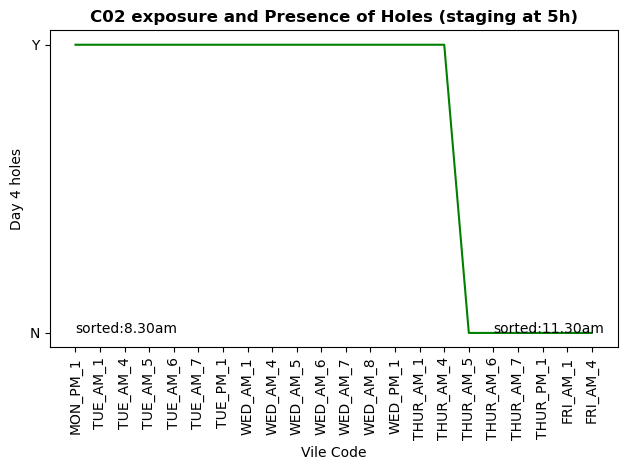

In [66]:

# want to filter out vile end codes not ending in 2 or 3 so only 5h


df_5h = df[df['staging time'] == '5h']

plt.plot(df_5h['Vile_Code'], df_5h['day4_holes_1PM'], color='green')

plt.gca().invert_yaxis()

plt.xticks(rotation=90)

plt.ylabel('Day 4 holes')
plt.xlabel('Vile Code')

plt.title('C02 exposure and Presence of Holes (staging at 5h)', fontweight='bold')

plt.annotate('sorted:8.30am', xy=(0, 1))
plt.annotate('sorted:11.30am', xy=(17, 1))

plt.tight_layout()

plt.savefig(os.path.join('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/analysis/pupa_plot_figures/co2_exposure_5h.png'))  
plt.show()


CONCLUSIONS:

- CO2 EFFECTS LESSEN OVER THE COURSE OF 3H ; HOWEVER, EXPOSURE CLOSE TO STAGING RESULTS IN NO HOLE FORMATION
- FRIDAY COLLECTION RESULTS IN HUGE FATALITY ACCROSS STAGING, PERHAPS DUE TO AGE OF FLIES 
- YOUNGER FLIES INCREASED LIKELIHOOD OF DEATH 
- LOSS APPEARED GREATER BETWEEN MON AND TUE - PERHAPS DUE TO CO2 EXPOSURE 
- STAGING ON THE TUESDAY RESULTED IN HUGE FATALITY- LIKELY DUE TO CO2 EXPOSURE PREVIOUS DAY- YOUNGER FLIES PARTICULARLY VUNRIBLE 

In [2]:
df2 = pd.read_excel('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/staging-paramaters/finished_staging_experiments/pupae_counting_staging.xlsx', 'pupa_experiment')

COMPARE 5H 4H AND 3H WHICH BEGAN WITH 50/20 RATIO 

In [3]:
female_50_condition = df2['number of females'] == 50
male_20_condition = df2['number of males'] == 20

time_of_staging_df = df2[female_50_condition & male_20_condition]

time_of_staging_df

,Vile_Code,number of females,number of males,Staging day,Age of flies,staging time,Net Loss,Total Flies,day4 holes,day4 larvae side,day7 hole,day7 pupae,Total Pupae
0,MON_PM_1,50,20,Monday,7,5h,0,70,Y,NaN,NaN,161,186
1,MON_PM_2,50,20,Monday,7,4h,0,70,Y,NaN,NaN,171,171
2,MON_PM_3,50,20,Monday,7,3h,0,70,N,NaN,NaN,46,46
3,TUE_AM_1,50,20,Monday,6,5h,0,70,Y,NaN,NaN,189,229
4,TUE_AM_2,50,20,Monday,6,4h,0,70,Y,NaN,NaN,137,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,THUR_PM_1,50,20,Friday,8,5h,2,68,Y,NaN,NaN,151,225
177,THUR_PM_2,50,20,Friday,8,4h,4,66,Y,NaN,NaN,107,219
178,FRI_AM_1,50,20,Friday,7,5h,9,61,N,NaN,NaN,166,166
179,FRI_AM_2,50,20,Friday,7,4h,12,58,N,NaN,NaN,106,106


In [4]:
# so for each unique age want to plot the total pupa from 3h 4h 5h 

time_of_staging_dict = {'Staged Hours': [], 'Age of Females': [], 'Mean Pupae': [], 'SD': []}


for age in time_of_staging_df['Age of flies '].unique():


    for time in time_of_staging_df['staging time'].unique():

        time_mean = time_of_staging_df[(time_of_staging_df['staging time'] == time) & (time_of_staging_df['Age of flies '] == age)]['Total Pupae'].mean()

        time_sd = time_of_staging_df[(time_of_staging_df['staging time'] == time) & (time_of_staging_df['Age of flies '] == age)]['Total Pupae'].std()

        data_to_add = {'Age': age, 'Mean Pupae': time_mean, 'SD': time_sd}


        time_of_staging_dict['Staged Hours'].append(time)
        time_of_staging_dict['Age of Females'].append(age)
        time_of_staging_dict['Mean Pupae'].append(time_mean)
        time_of_staging_dict['SD'].append(time_sd)
        

time_of_staging = pd.DataFrame(time_of_staging_dict)


time_of_staging

# each age: mean and sd BUT NEED TO SAVE SOMWHERE 

,Staged Hours,Age of Females,Mean Pupae,SD
0,5h,7,255.000000,74.273625
1,4h,7,160.750000,42.033150
2,3h,7,104.625000,42.149182
3,5h,6,214.571429,45.697765
4,4h,6,155.285714,69.593377
5,3h,6,71.285714,25.427769
6,5h,5,236.600000,84.408530
7,4h,5,163.800000,50.096906
8,3h,5,102.800000,91.791612
9,5h,4,164.333333,46.522396


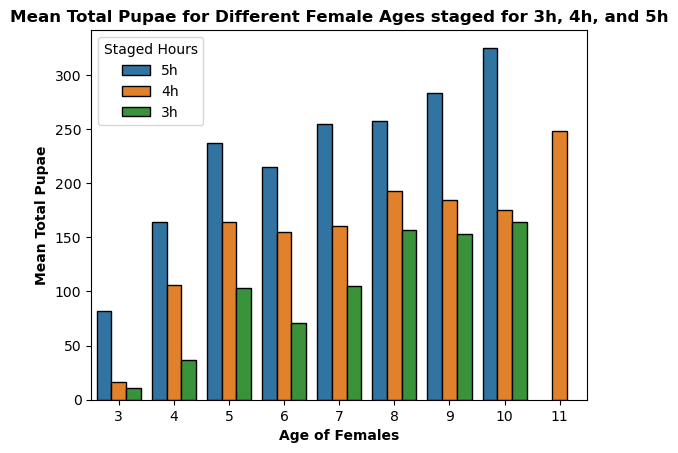

In [5]:
sns.barplot(data=time_of_staging, x='Age of Females', y='Mean Pupae', hue='Staged Hours', edgecolor='black', )

plt.title('Mean Total Pupae for Different Female Ages staged for 3h, 4h, and 5h', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Mean Total Pupae', fontweight='bold')

# adding in error bars seems to be the hardest thing on earth stupidly 
# order 5h, 4h, 3h 
# make prettier
# do i incorporate loss? depends on sd

plt.show()

/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_58955/3115941490.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=time_of_staging_df, x='Age of flies ', y='Total Pupae', hue='staging time', edgecolor='black', ci='sd', palette='viridis')


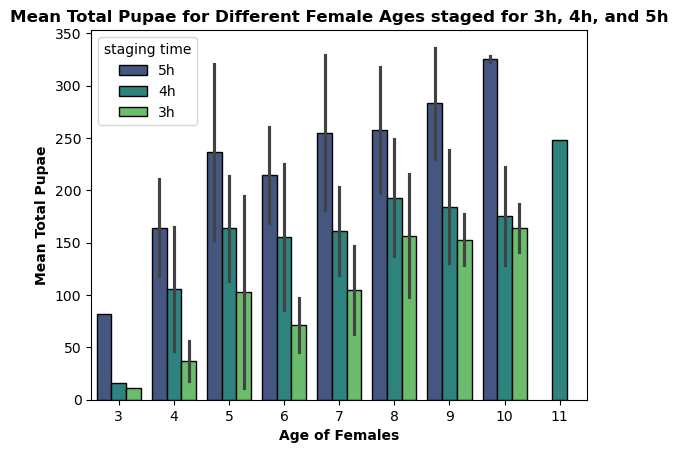

In [6]:

sns.barplot(data=time_of_staging_df, x='Age of flies ', y='Total Pupae', hue='staging time', edgecolor='black', ci='sd', palette='viridis')

plt.title('Mean Total Pupae for Different Female Ages staged for 3h, 4h, and 5h', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Mean Total Pupae', fontweight='bold')

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Pupa for 5020 staging (3h,4h and 5h).png', dpi=300, bbox_inches='tight')

plt.show()

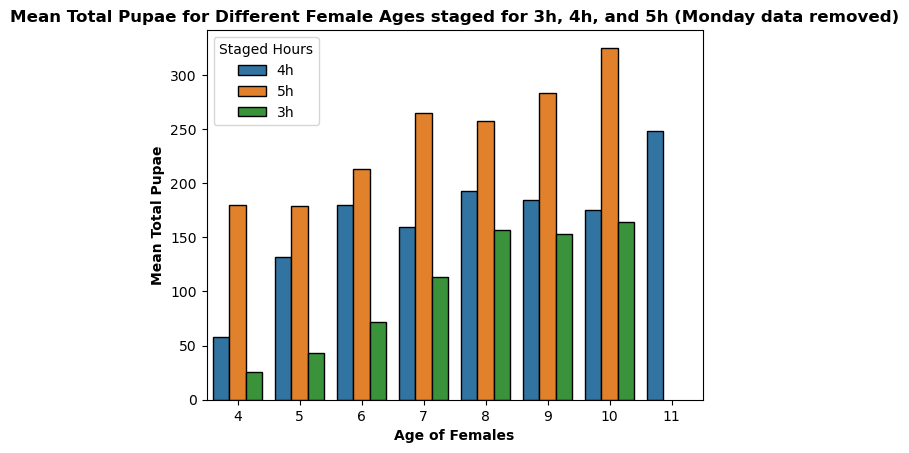

In [7]:
# now ignore mondays data 

time_of_staging_no_monday_df = time_of_staging_df.drop(time_of_staging_df[time_of_staging_df['Staging day'] == 'Monday'].index)


time_of_staging_no_monday_dict = {'Staged Hours': [], 'Age of Females': [], 'Mean Pupae': [], 'SD': []}


for age in time_of_staging_no_monday_df['Age of flies '].unique():


    for time in time_of_staging_no_monday_df['staging time'].unique():

        time_mean = time_of_staging_no_monday_df[(time_of_staging_no_monday_df['staging time'] == time) & (time_of_staging_no_monday_df['Age of flies '] == age)]['Total Pupae'].mean()

        time_sd = time_of_staging_no_monday_df[(time_of_staging_no_monday_df['staging time'] == time) & (time_of_staging_no_monday_df['Age of flies '] == age)]['Total Pupae'].std()

        data_to_add = {'Age': age, 'Mean Pupae': time_mean, 'SD': time_sd}


        time_of_staging_no_monday_dict['Staged Hours'].append(time)
        time_of_staging_no_monday_dict['Age of Females'].append(age)
        time_of_staging_no_monday_dict['Mean Pupae'].append(time_mean)
        time_of_staging_no_monday_dict['SD'].append(time_sd)
        

time_of_staging_no_monday = pd.DataFrame(time_of_staging_no_monday_dict)


time_of_staging_no_monday


sns.barplot(data=time_of_staging_no_monday, x='Age of Females', y='Mean Pupae', hue='Staged Hours', edgecolor='black', )

plt.title('Mean Total Pupae for Different Female Ages staged for 3h, 4h, and 5h (Monday data removed)', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Mean Total Pupae', fontweight='bold')

# adding in error bars seems to be the hardest thing on earth stupidly 
# order 5h, 4h, 3h
# make prettier
# do i incorporate loss? depends on sd

plt.show()


/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_58955/387923708.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=time_of_staging_no_monday_df, x='Age of flies ', y='Total Pupae', hue='staging time', edgecolor='black', ci='sd', palette='viridis')


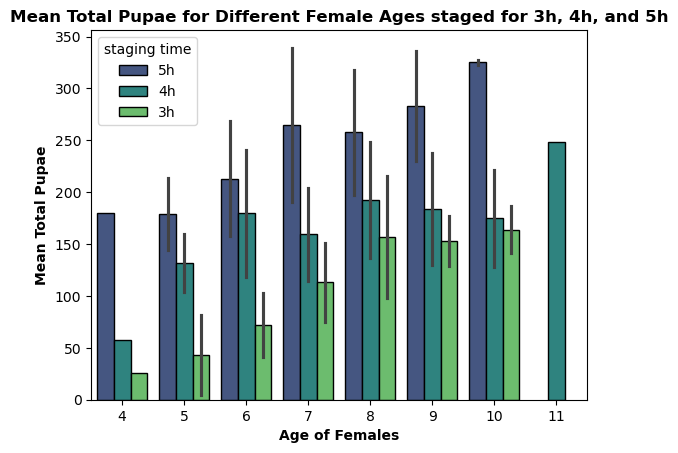

In [8]:

time_of_staging_no_monday_df = time_of_staging_df.drop(time_of_staging_df[time_of_staging_df['Staging day'] == 'Monday'].index)

sns.barplot(data=time_of_staging_no_monday_df, x='Age of flies ', y='Total Pupae', hue='staging time', edgecolor='black', ci='sd', palette='viridis')

plt.title('Mean Total Pupae for Different Female Ages staged for 3h, 4h, and 5h', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Mean Total Pupae', fontweight='bold')
plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Pupa for 5020 staging (3h,4h and 5h)_nomonday.png', dpi=300, bbox_inches='tight')
plt.show()

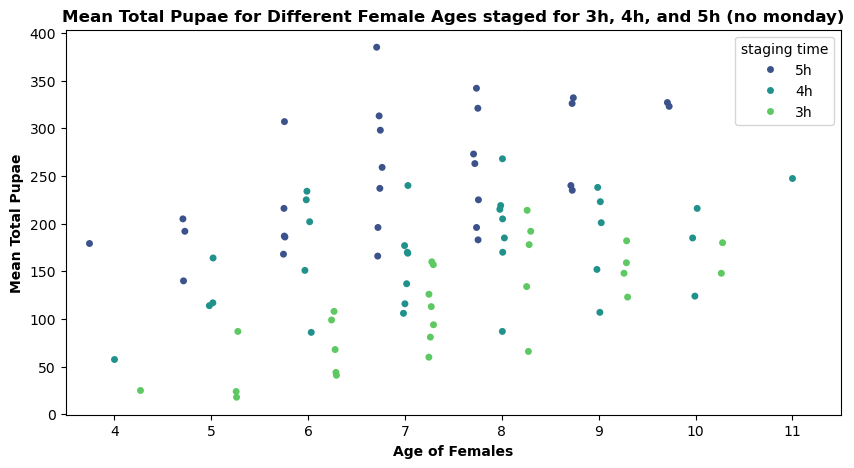

In [9]:
plt.figure(figsize=(10, 5))

sns.stripplot(data=time_of_staging_no_monday_df, x='Age of flies ', y='Total Pupae',hue='staging time', dodge=True, palette='viridis', jitter=True)

plt.title('Mean Total Pupae for Different Female Ages staged for 3h, 4h, and 5h (no monday)', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Mean Total Pupae', fontweight='bold')
plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Age_pupa_staging_no_monday_dot_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [10]:
# plot different numbers for the 5h- original numbers as a ratio but idek how to incorporate loss  

condition_5h = df2['staging time'] == '5h'

# had to add in this copy for it to work and unsure why?? ensure changes dont relfect back on df2

number_of_flies_df = df2[condition_5h].copy()

number_of_flies_df['Ratio'] = (number_of_flies_df['number of females'].astype(str) + ':' + number_of_flies_df['number of males'].astype(str))


number_of_flies_df

# DROP MONDAY 

,Vile_Code,number of females,number of males,Staging day,Age of flies,staging time,Net Loss,Total Flies,day4 holes,day4 larvae side,day7 hole,day7 pupae,Total Pupae,Ratio
0,MON_PM_1,50,20,Monday,7,5h,0,70,Y,NaN,NaN,161,186,50:20
3,TUE_AM_1,50,20,Monday,6,5h,0,70,Y,NaN,NaN,189,229,50:20
6,TUE_AM_4,60,20,Monday,6,5h,0,80,Y,NaN,NaN,134,177,60:20
7,TUE_AM_5,40,20,Monday,6,5h,0,60,Y,NaN,NaN,144,147,40:20
8,TUE_AM_6,50,10,Monday,6,5h,1,59,Y,NaN,NaN,156,167,50:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,THUR_AM_6,50,10,Friday,8,5h,14,46,N,NaN,NaN,146,146,50:10
175,THUR_AM_7,50,30,Friday,8,5h,4,76,Y,NaN,NaN,183,241,50:30
176,THUR_PM_1,50,20,Friday,8,5h,2,68,Y,NaN,NaN,151,225,50:20
178,FRI_AM_1,50,20,Friday,7,5h,9,61,N,NaN,NaN,166,166,50:20


In [11]:
print(number_of_flies_df[(number_of_flies_df['Staging day'] == 'Friday') & (number_of_flies_df['staging time'] == '5h')])

     Vile_Code  number of females  number of males Staging day  Age of flies   \
148   TUE_AM_1                 50               20      Friday             10   
151   TUE_AM_4                 60               20      Friday             10   
152   TUE_AM_5                 40               20      Friday             10   
153   TUE_AM_6                 50               10      Friday             10   
154   TUE_AM_7                 50               30      Friday             10   
155   TUE_PM_1                 50               20      Friday             10   
158   WED_AM_1                 50               20      Friday              9   
161   WED_AM_4                 60               20      Friday              9   
162   WED_AM_5                 40               20      Friday              9   
163   WED_AM_6                 50               30      Friday              9   
164   WED_AM_7                 50               10      Friday              9   
165   WED_AM_8              

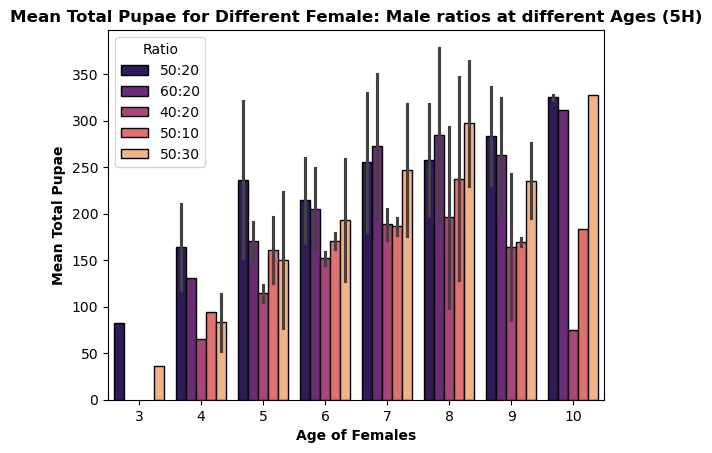

In [12]:
# age: x axis y: pupa bars: ratio

hue_order = number_of_flies_df['Ratio'].unique()

sns.barplot(data=number_of_flies_df, x='Age of flies ', y='Total Pupae', hue='Ratio', edgecolor='black', errorbar='sd', palette='magma', hue_order=hue_order)

plt.title('Mean Total Pupae for Different Female: Male ratios at different Ages (5H)', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Mean Total Pupae', fontweight='bold')
plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Mean Total Pupae for Different Female: Male ratios at different Ages (5H).png', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_58955/123500552.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=number_of_flies_no_monday_df, x='Age of flies ', y='Total Pupae', edgecolor='black', hue='Ratio', ci='sd', palette='magma')


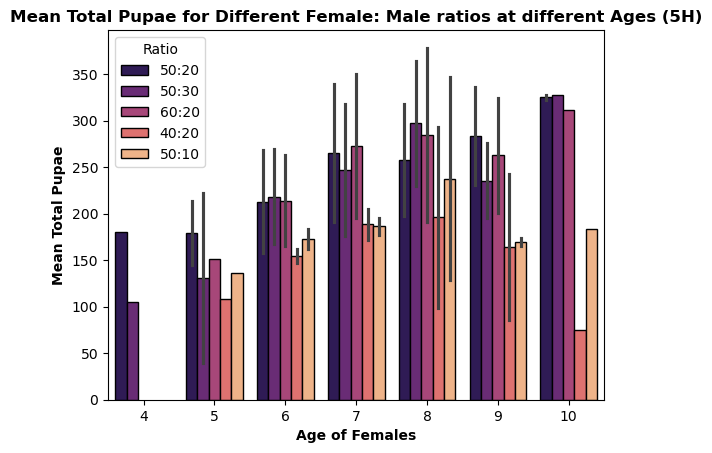

In [13]:


number_of_flies_no_monday_df = number_of_flies_df[number_of_flies_df['Staging day'] != 'Monday']


sns.barplot(data=number_of_flies_no_monday_df, x='Age of flies ', y='Total Pupae', edgecolor='black', hue='Ratio', ci='sd', palette='magma')

plt.title('Mean Total Pupae for Different Female: Male ratios at different Ages (5H)', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Mean Total Pupae', fontweight='bold')
plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Mean Total Pupae for Different Female: Male ratios at different Ages (5H)_nomonday.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_58955/466018989.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=removed_ratio_df, x='Age of flies ', y='Total Pupae', edgecolor='black', hue='Ratio', ci='sd', palette='Purples_d')


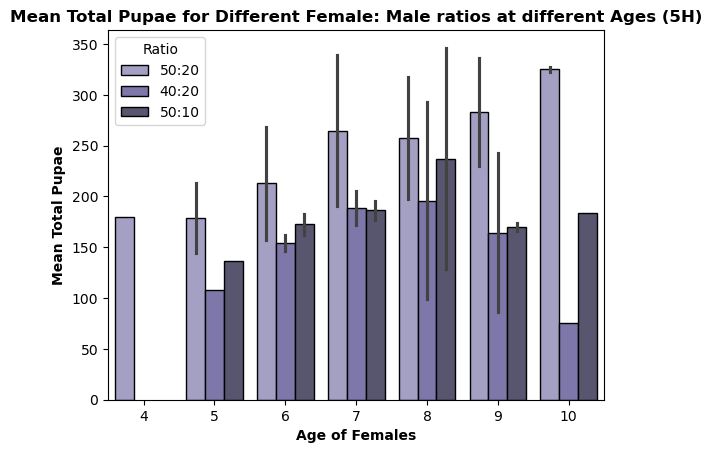

In [14]:
number_of_flies_no_monday_df = number_of_flies_df[number_of_flies_df['Staging day'] != 'Monday']

removed_ratio_df = number_of_flies_no_monday_df[(number_of_flies_no_monday_df['Ratio'] != '50:30') & (number_of_flies_no_monday_df['Ratio'] != '60:20')]


sns.barplot(data=removed_ratio_df, x='Age of flies ', y='Total Pupae', edgecolor='black', hue='Ratio', ci='sd', palette='Purples_d')

plt.title('Mean Total Pupae for Different Female: Male ratios at different Ages (5H)', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Mean Total Pupae', fontweight='bold')
plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Pupae_Ratios(5020_4020_5010).png', dpi=300, bbox_inches='tight')
plt.show()



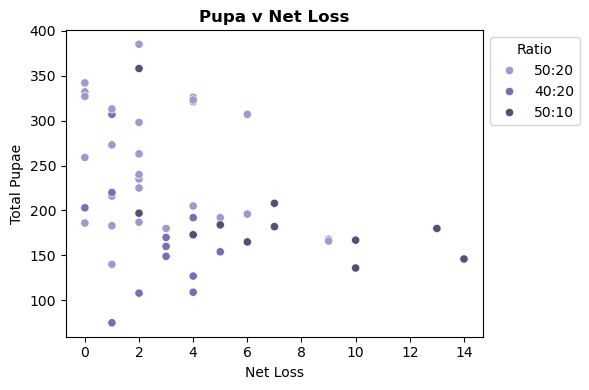

In [15]:

plt.figure(figsize=(6, 4))

sns.scatterplot(data=removed_ratio_df, x='Net Loss', y='Total Pupae', hue='Ratio', palette='Purples_d')

plt.title('Pupa v Net Loss', fontweight='bold')
plt.xlabel('Net Loss')
plt.ylabel('Total Pupae')
plt.legend(title='Ratio')

plt.legend(title='Ratio', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Pupae_Loss_Ratios(5020_4020_5010).png', dpi=300, bbox_inches='tight')
plt.show()

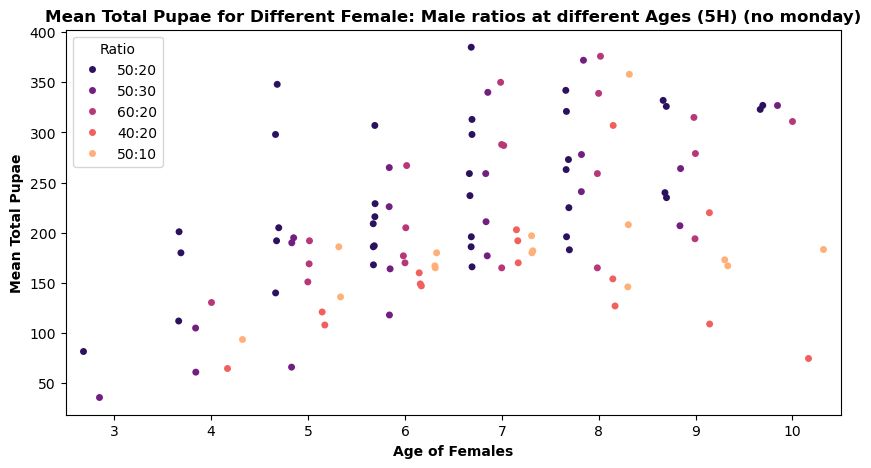

In [27]:
plt.figure(figsize=(10, 5))

sns.stripplot(data=number_of_flies_df, x='Age of flies ', y='Total Pupae', hue='Ratio', dodge=True, palette='magma', jitter=True)

plt.title('Mean Total Pupae for Different Female: Male ratios at different Ages (5H) (no monday)', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Mean Total Pupae', fontweight='bold')
plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Mean_pupa_Different_Female_Ages_ratio_no_monday_dot_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# plot total remaining v pupa per condiiton 

In [18]:

# MEAN TOTAL LOSS PER CONDITIN PER DAY (HOURS AND RATIO) N OF EACH ODNITON ALS
# WANT A TABLE COLUMNS: AGE: VILE FLY RATIO: HOURS STAGED: N: RANGE: MEAN TOTAL LOSS 
# mondays data not included

mean_loss_per_vile_per_condition_per_day = pd.DataFrame(columns=['Age', 'Female:Male', 'N', 'Max Loss', 'Min Loss', 'Range', 'Mean Total Loss'])

group1 = number_of_flies_no_monday_df.groupby(['Age of flies ', 'Ratio'])


# iterating over tuple here; the group above has two columns so you unpack them into 2 variables and iterate over them
# group is the second item in the tuple returned by the iterator: the group itself, a DataFrame 
# containing only the rows that match the current group's key (age, time). 
# This allows you to perform operations on just this subset of the data
for (age, ratio), group in group1:

    mean_total_loss = group['Net Loss'].mean()
    max_loss = group['Net Loss'].max()
    min_loss = group['Net Loss'].min()
    loss_range = group['Net Loss'].max() - group['Net Loss'].min()
    n = group['Net Loss'].count()

    # Create a DataFrame for the new row
    new_row_df = pd.DataFrame({
        'Age': [age], 
        'Time Staging': [time], 
        'Max Loss': [max_loss],
        'Min Loss': [min_loss],
        'N': [n], 
        'Range': [loss_range], 
        'Mean Total Loss': [mean_total_loss]
    })

    # pd contact only used with pd series

    mean_loss_per_vile_per_condition_per_day = pd.concat([mean_loss_per_vile_per_condition_per_day2, new_row_df], ignore_index=True)

mean_loss_per_vile_per_condition_per_day





,Age,Time Staging,N,Max Loss,Min Loss,Range,Mean Total Loss
0,4,3h,1,5,5,0,5.000000
1,4,4h,1,7,7,0,7.000000
2,4,5h,1,3,3,0,3.000000
3,5,3h,3,6,0,6,3.333333
4,5,4h,3,10,3,7,5.666667
5,5,5h,3,5,1,4,3.333333
6,6,3h,5,9,0,9,3.400000
7,6,4h,5,11,3,8,5.600000
8,6,5h,5,9,0,9,3.600000
9,7,3h,7,10,0,10,3.000000


In [17]:
mean_loss_per_vile_per_condition_per_day2 = pd.DataFrame(columns=['Age', 'Time Staging', 'N', 'Max Loss', 'Min Loss', 'Range', 'Mean Total Loss'])

# Assuming time_of_staging_no_monday_df is your DataFrame
group2 = time_of_staging_no_monday_df.groupby(['Age of flies ', 'staging time'])

for (age, time), group in group2:

    mean_total_loss = group['Net Loss'].mean()
    max_loss = group['Net Loss'].max()
    min_loss = group['Net Loss'].min()
    loss_range = group['Net Loss'].max() - group['Net Loss'].min()
    n = group['Net Loss'].count()

    # Create a DataFrame for the new row
    new_row_df = pd.DataFrame({
        'Age': [age], 
        'Time Staging': [time], 
        'Max Loss': [max_loss],
        'Min Loss': [min_loss],
        'N': [n], 
        'Range': [loss_range], 
        'Mean Total Loss': [mean_total_loss]
    })

    # Append the new row to the existing DataFrame
    mean_loss_per_vile_per_condition_per_day2 = pd.concat([mean_loss_per_vile_per_condition_per_day2, new_row_df], ignore_index=True)

mean_loss_per_vile_per_condition_per_day2




,Age,Time Staging,N,Max Loss,Min Loss,Range,Mean Total Loss
0,4,3h,1,5,5,0,5.000000
1,4,4h,1,7,7,0,7.000000
2,4,5h,1,3,3,0,3.000000
3,5,3h,3,6,0,6,3.333333
4,5,4h,3,10,3,7,5.666667
5,5,5h,3,5,1,4,3.333333
6,6,3h,5,9,0,9,3.400000
7,6,4h,5,11,3,8,5.600000
8,6,5h,5,9,0,9,3.600000
9,7,3h,7,10,0,10,3.000000


In [ ]:
# plot lost v pupa produced with hue different conditions?
# plot the loss at the bottom and the total pupa on the y axis- however i want subplots depending on the conditon 
# (staging time and also ratios beign different conditions) and then i want on these subplots to have a hue for the age  


# Use seaborn's FacetGrid or catplot to create subplots based on the 'staging time' and 'ratios' conditions.

# Within each subplot, plot 'Net Loss' along the x-axis and 'Total Pupae' on the y-axis, using 'Age of flies' as the hue to differentiate the data points.

/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_53966/3519688736.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_5020['Age of flies'] = df_filtered_5020['Age of flies '].astype('category')
/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


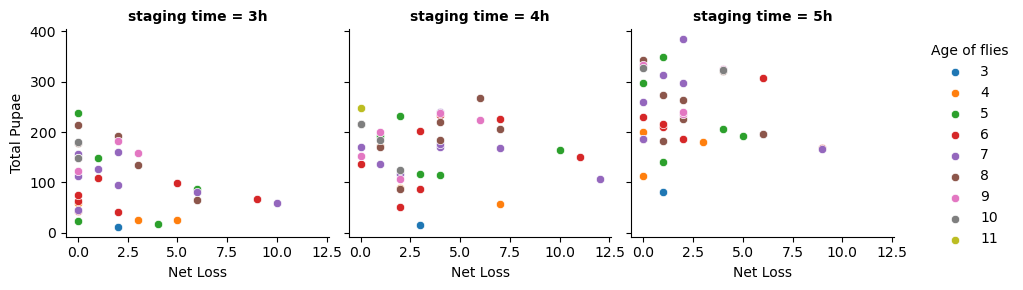

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame after loading and preprocessing the data.
# Codf_filtered_5020['staging time'] = df_filtered_5020['staging time'].astype('category')
df_filtered_5020['Age of flies'] = df_filtered_5020['Age of flies '].astype('category')

# Create a FacetGrid for subplots based on 'staging time' and 'ratios' conditions
# 'col' and 'row' parameters could be adjusted based on your specific conditions.
g = sns.FacetGrid(df_filtered_5020, col='staging time', hue='Age of flies ', col_wrap=4)

# Map a scatter plot to the FacetGrid
g.map(sns.scatterplot, 'Net Loss', 'Total Pupae')

# Add a legend

g.add_legend(title='Age of flies', bbox_to_anchor=(0.8, 0.5), loc='center right')

# Set the axis labels
g.set_axis_labels('Net Loss', 'Total Pupae')

# Adjust the subplot titles if necessary
g.set_titles(col_template="{col_name}")
g.set_titles(row_template='{row_name}', fontweight='bold')


plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/netloss_pupa_stagingtime_all.png', dpi=300, bbox_inches='tight') 
# Show the plot
plt.show()



/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_53966/146695952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_5020['staging time'] = df_filtered_5020['staging time'].astype('category')
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_53966/146695952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_5020['Age of flies'] = df_filtered_5020['Age of flies '].astype('category')
/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid

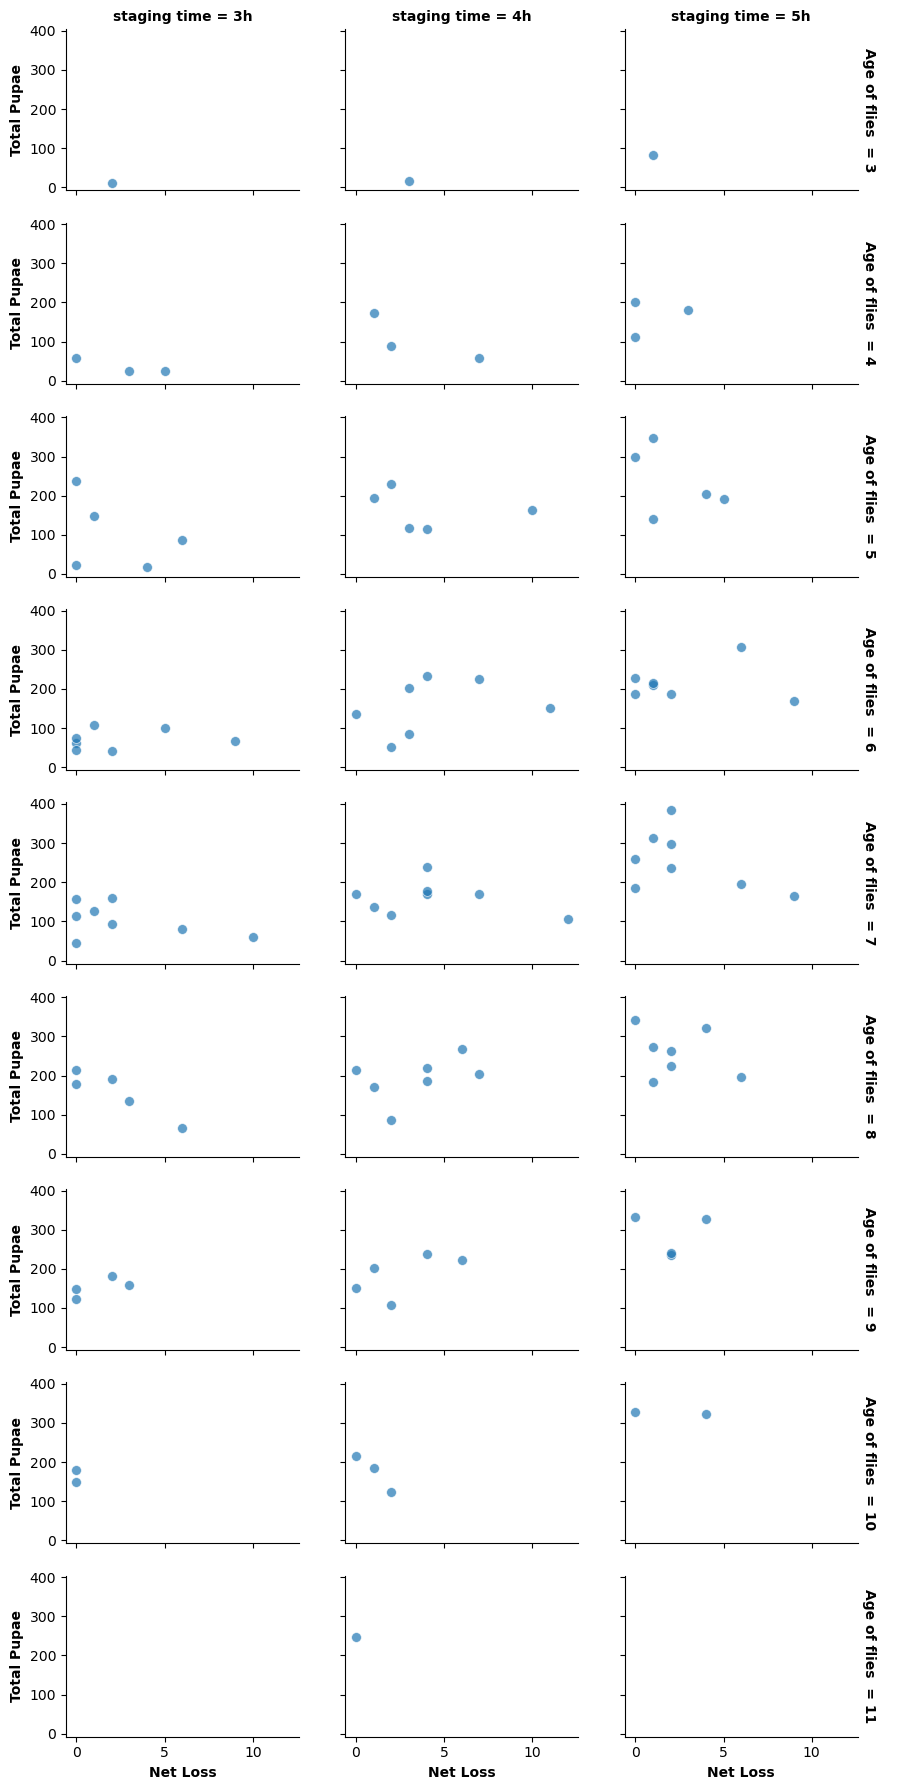

In [35]:
df2['Ratio'] =  (df2['number of females'].astype(str) + ':' + df2['number of males'].astype(str))


df_filtered_5020 = df2[df2['Ratio'] == '50:20']

df_filtered_5020['staging time'] = df_filtered_5020['staging time'].astype('category')
df_filtered_5020['Age of flies'] = df_filtered_5020['Age of flies '].astype('category')

# Create a FacetGrid to make subplots for each 'Age of flies' and within those for each 'Ratio'

g = sns.FacetGrid(df_filtered_5020, row='Age of flies ', col='staging time', margin_titles=True, height=2, aspect=1.5)

# Map a scatter plot to the FacetGrid
g.map(sns.scatterplot, 'Net Loss', 'Total Pupae', s=50, alpha=0.7)

# Add a legend
g.add_legend()

# Set the axis labels for each subplot
g.set_axis_labels('Net Loss', 'Total Pupae', fontweight='bold')

# Set the titles for each subplot

g.set_titles(template="{row_name} / {col_name}", fontweight='bold')


# Adjust the height of each subplot for better readability
g.fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/netloss_pupa_stagingtime.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()




/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


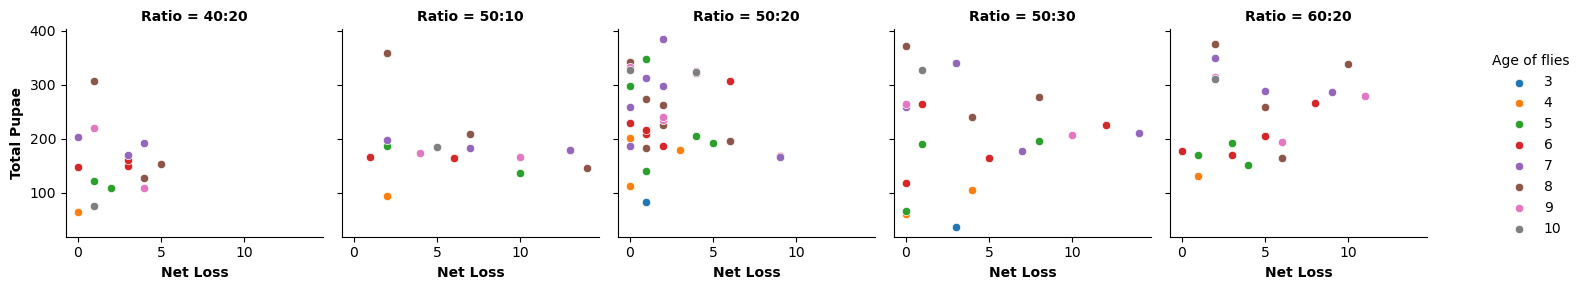

In [38]:
number_of_flies_df

# Ensure that 'staging time', 'Age of flies', and 'Ratio' are the correct data types

number_of_flies_df['Age of flies '] = number_of_flies_df['Age of flies '].astype('category')
number_of_flies_df['Ratio'] = number_of_flies_df['Ratio'].astype('category')

# Create a FacetGrid to make subplots based on 'staging time' and 'Ratio'
g = sns.FacetGrid(number_of_flies_df, col='Ratio', hue='Age of flies ', margin_titles=True)


# Map a scatter plot to the FacetGrid
g.map(sns.scatterplot, 'Net Loss', 'Total Pupae')

# Add a legend
g.add_legend()

# Set the axis labels for each subplot
g.set_axis_labels('Net Loss', 'Total Pupae', fontweight='bold')

# Set the titles for each subplot
g.set_titles(row_template='{row_name}', fontweight='bold')

# Adjust the height of each subplot for better readability
g.fig.subplots_adjust(hspace=0.4)

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Netloss_ratio_pupa.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()


/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


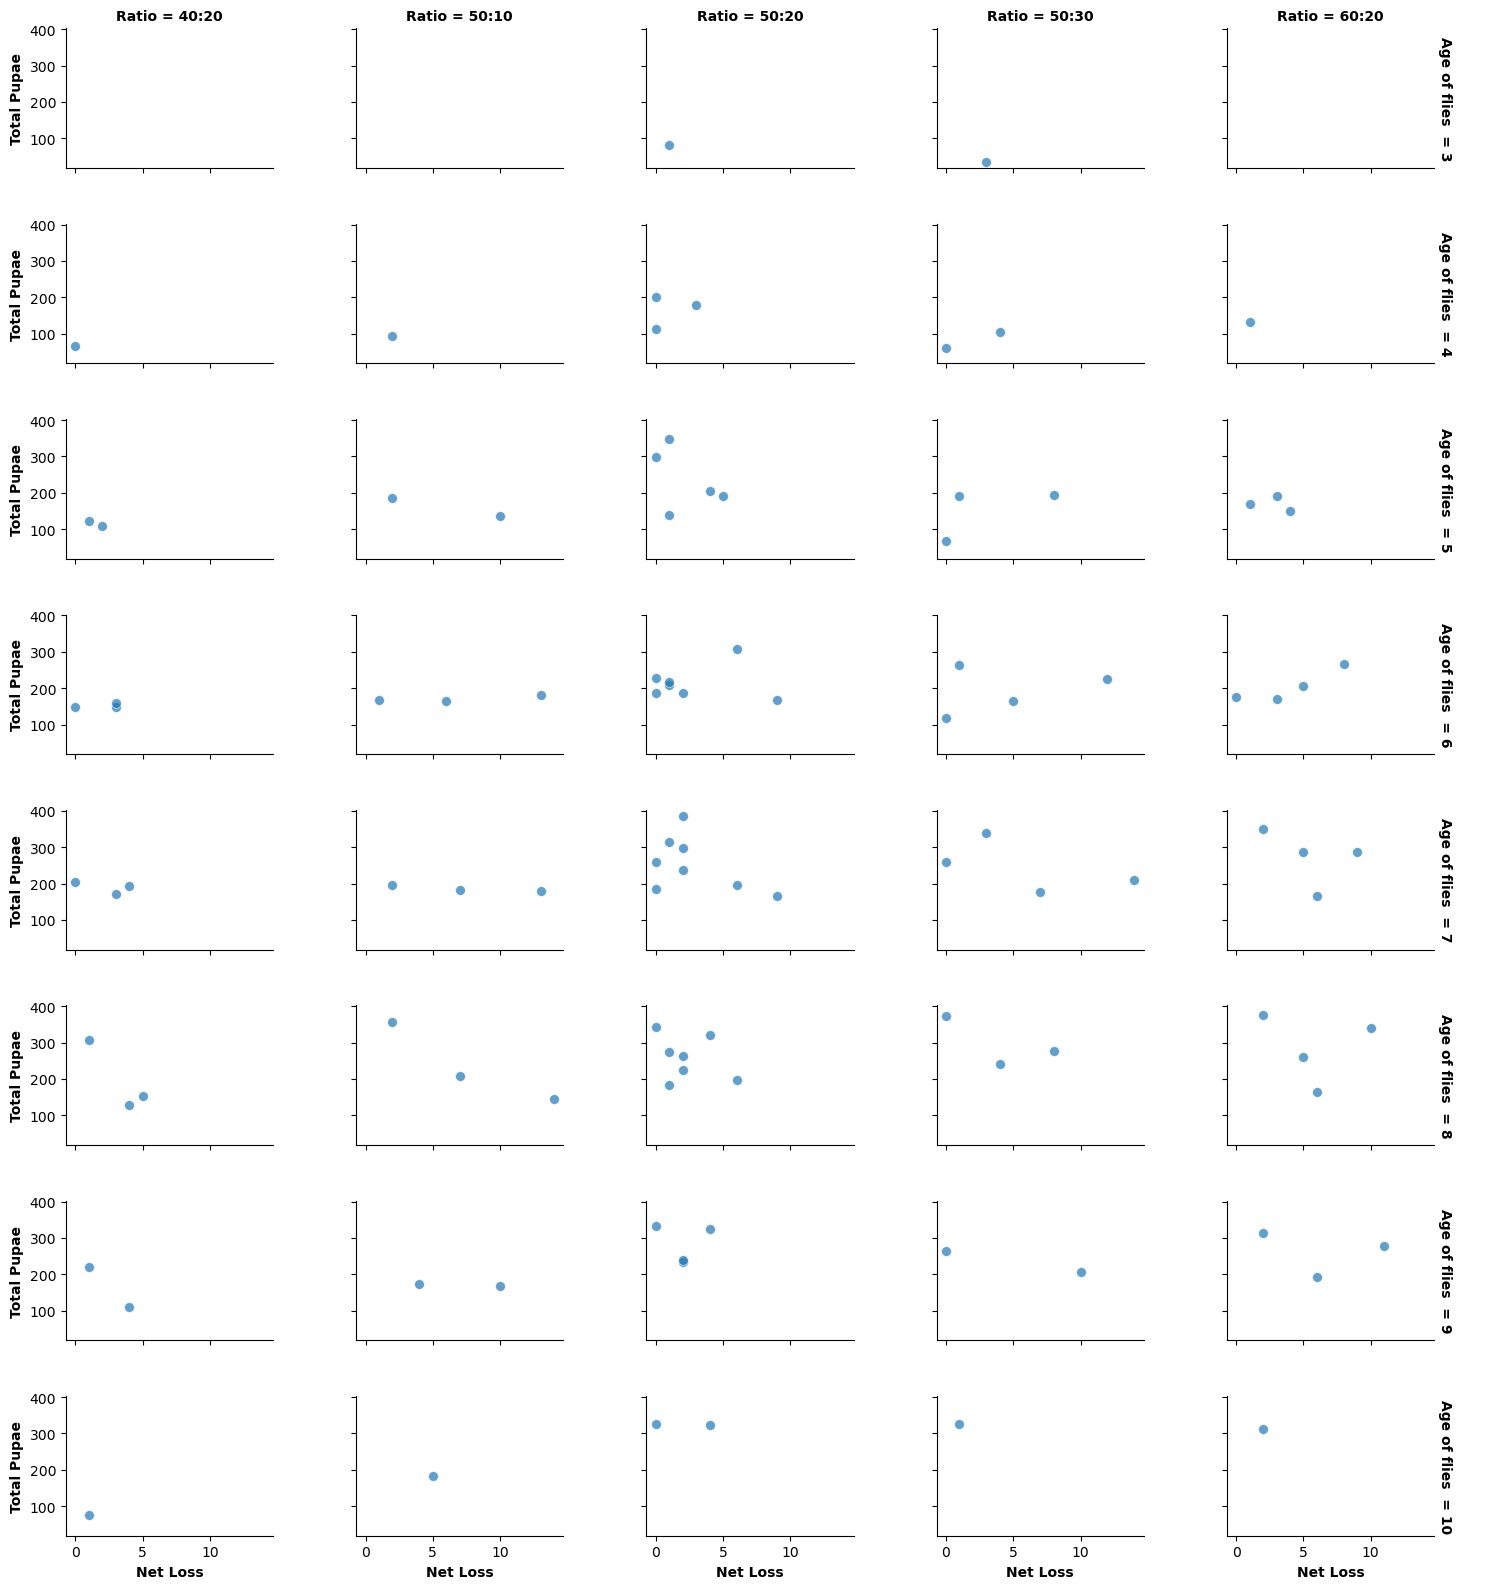

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame after loading the data.

# Ensure that 'Age of flies' and 'Ratio' are the correct data types
number_of_flies_df['Age of flies '] = number_of_flies_df['Age of flies '].astype('category')
number_of_flies_df['Ratio'] = number_of_flies_df['Ratio'].astype('category')

# Create a FacetGrid to make subplots for each 'Age of flies' and within those for each 'Ratio'
g = sns.FacetGrid(number_of_flies_df, row='Age of flies ', col='Ratio', margin_titles=True, aspect=1.5, height=2)


# Map a scatter plot to the FacetGrid
g.map(sns.scatterplot, 'Net Loss', 'Total Pupae', s=50, alpha=0.7)

# Add a legend
g.add_legend()

# Set the axis labels for each subplot
g.set_axis_labels('Net Loss', 'Total Pupae', fontweight='bold')

# Set the titles for each subplot

g.set_titles(template="{row_name} / {col_name}", fontweight='bold')


# Adjust the height of each subplot for better readability
g.fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Netloss_ratio_pupa_subplot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
# day7 v total 
# JUST THE DIFFERENCE IN A COLUMN ADJACANT TO IT 


/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


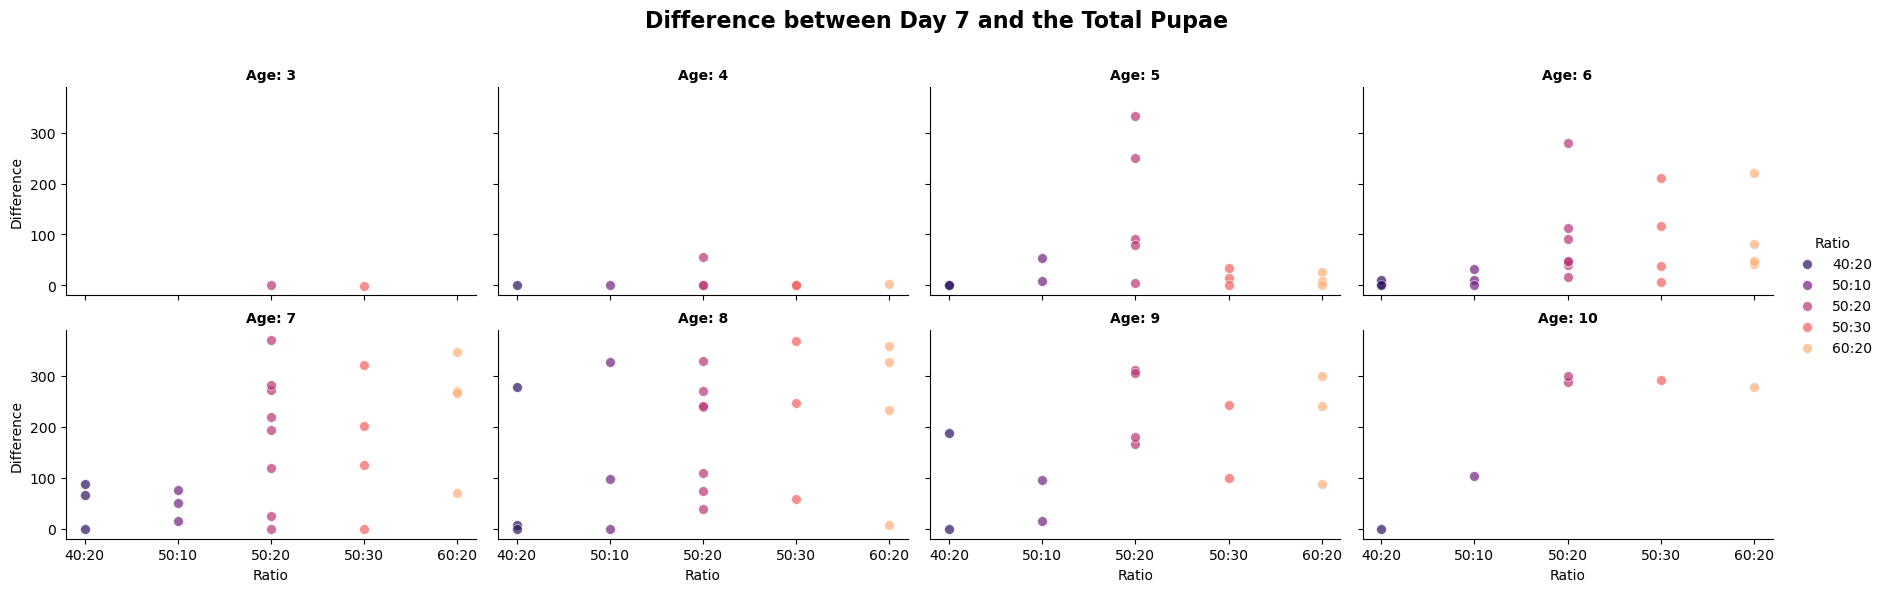

In [40]:

# Assuming number_of_flies_df is your DataFrame and it's already been loaded

number_of_flies_df['Difference'] = number_of_flies_df['Total Pupae'] - number_of_flies_df['day7 pupae']

# Create a FacetGrid to make subplots for each 'Age of flies' horizontally
g = sns.FacetGrid(number_of_flies_df, col='Age of flies ', hue='Ratio', col_wrap=4, margin_titles=True, aspect=1.5, palette='magma')

# Map a scatter plot to the FacetGrid
g.map(sns.scatterplot, 'Ratio', 'Difference', s=50, alpha=0.7)

# Add a legend
g.add_legend(title='Ratio')

# Set the axis labels for each subplot
g.set_axis_labels('Ratio', 'Difference')

# Set the titles for each subplot
g.set_titles(col_template="Age: {col_name}", fontweight='bold')

# Add a main title
plt.subplots_adjust(top=0.85)  # Adjust the top to make space for suptitle if necessary
g.fig.suptitle('Difference between Day 7 and the Total Pupae', fontsize=16, fontweight='bold')

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/day7_v_tota_pupa_ratio.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()


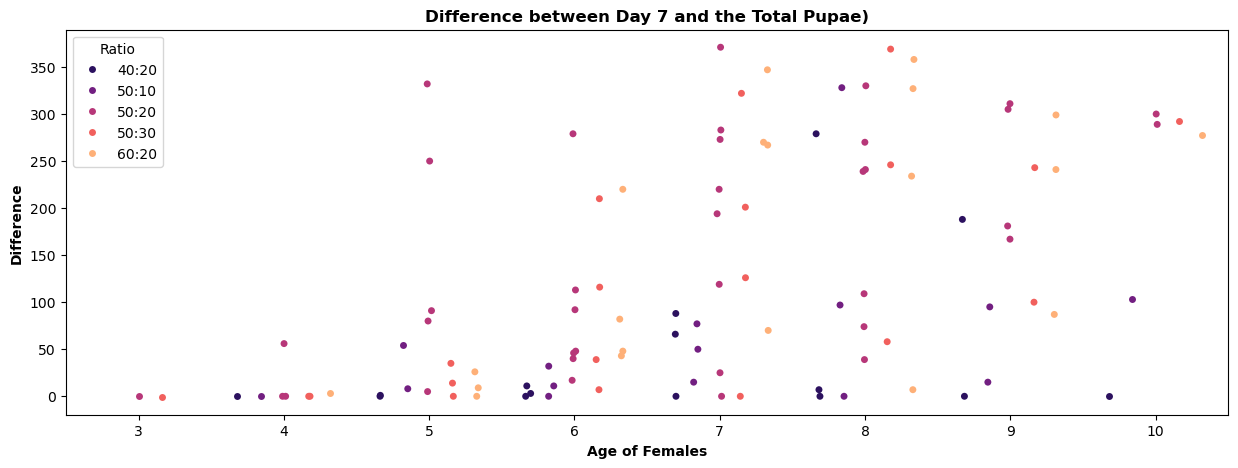

In [41]:
plt.figure(figsize=(15, 5))

sns.stripplot(data=number_of_flies_df, x='Age of flies ', y='Difference', hue='Ratio', dodge=True, palette='magma', jitter=True)

plt.title('Difference between Day 7 and the Total Pupae)', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Difference', fontweight='bold')


plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/day7_v_tota_pupa_ratio_1plot.png', dpi=300, bbox_inches='tight')

  

plt.show()



/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_53966/2886748693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_5020['Difference'] = df_filtered_5020['Total Pupae'] - df_filtered_5020['day7 pupae']
/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


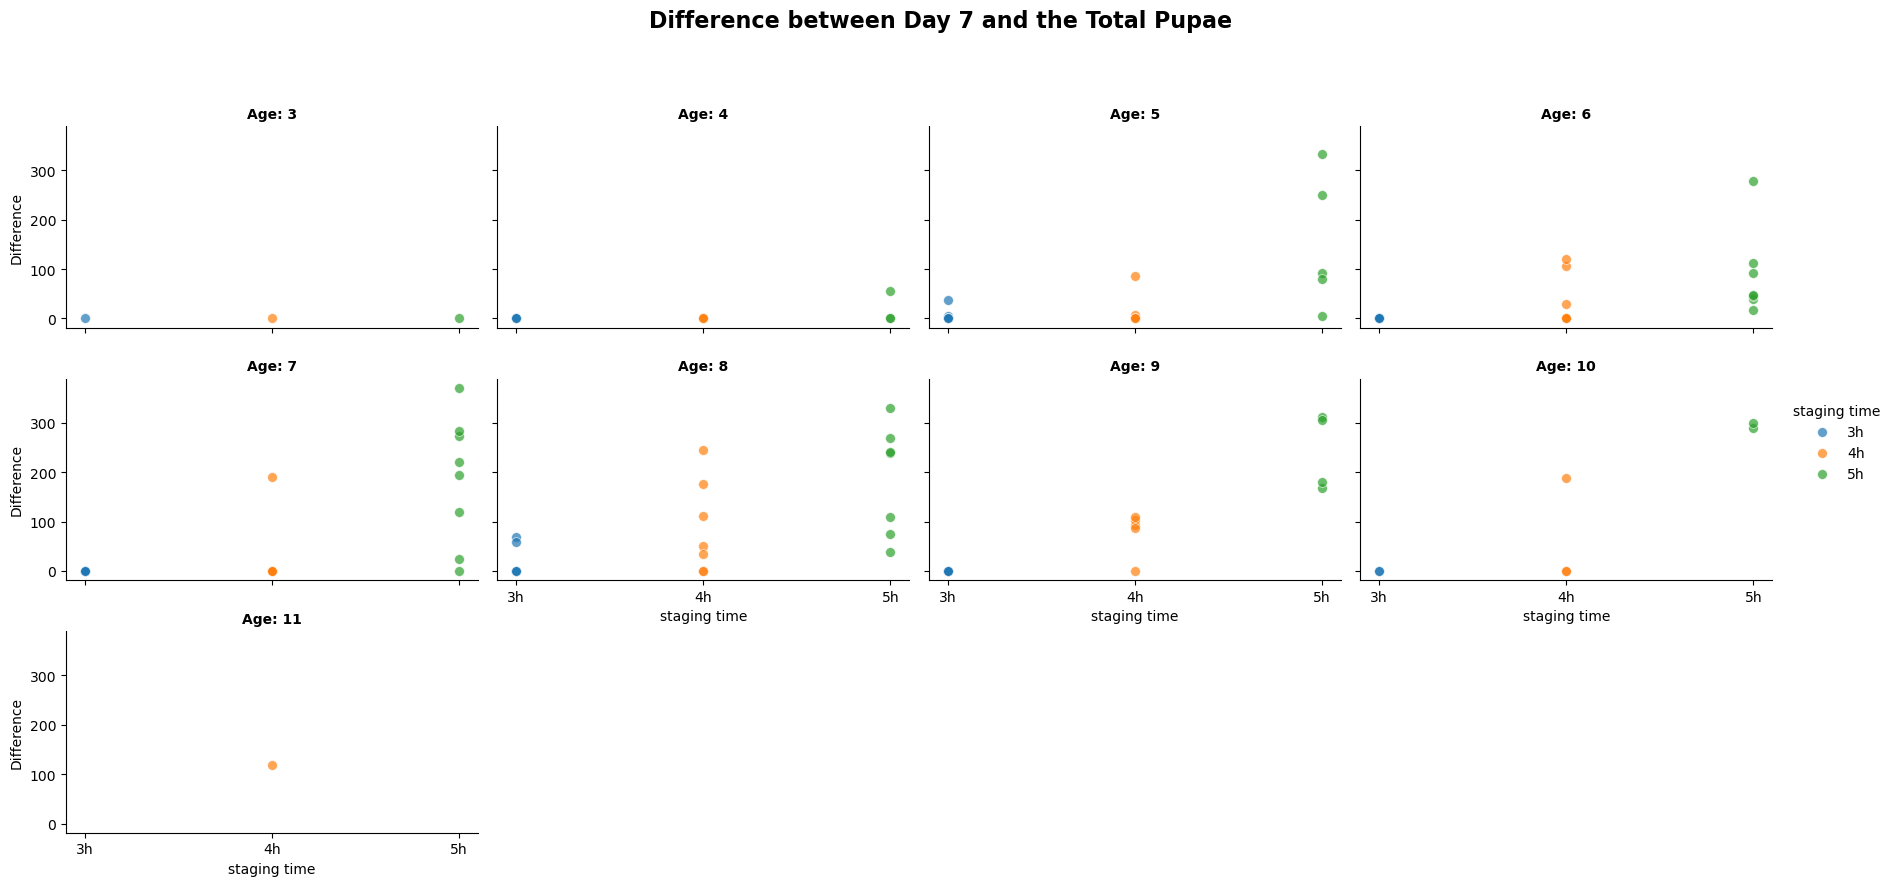

In [42]:
df_filtered_5020['Difference'] = df_filtered_5020['Total Pupae'] - df_filtered_5020['day7 pupae']

# Create a FacetGrid to make subplots for each 'Age of flies' horizontally
g = sns.FacetGrid(df_filtered_5020, col='Age of flies ', hue='staging time', col_wrap=4, margin_titles=True, aspect=1.5)

# Map a scatter plot to the FacetGrid
g.map(sns.scatterplot, 'staging time', 'Difference', s=50, alpha=0.7)

# Add a legend
g.add_legend(title='staging time')

# Set the axis labels for each subplot
g.set_axis_labels('staging time', 'Difference')

# Set the titles for each subplot
g.set_titles(col_template="Age: {col_name}", fontweight='bold')

# Add a main title
plt.subplots_adjust(top=0.85)  # Adjust the top to make space for suptitle if necessary
g.fig.suptitle('Difference between Day 7 and the Total Pupae', fontsize=16, fontweight='bold')

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/day7_v_tota_pupa_staging.png', dpi=300, bbox_inches='tight')

 
# Show the plot
plt.show()

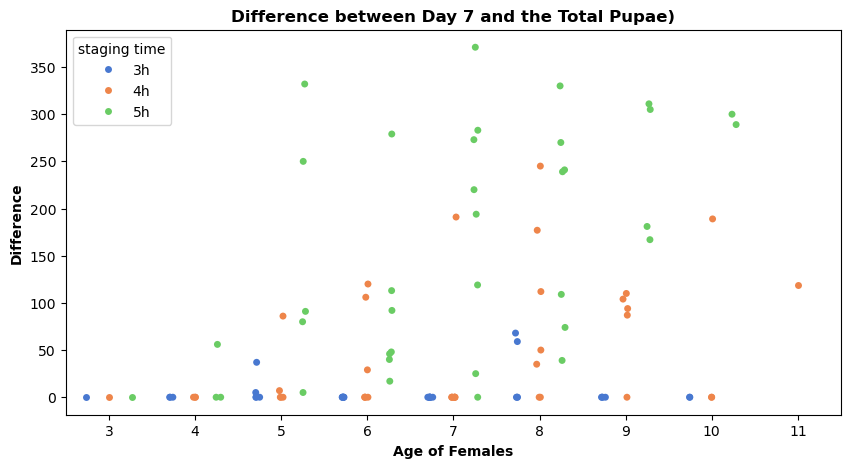

In [43]:


plt.figure(figsize=(10, 5))

sns.stripplot(data=df_filtered_5020, x='Age of flies ', y='Difference', hue='staging time', dodge=True, palette='muted', jitter=True)

plt.title('Difference between Day 7 and the Total Pupae)', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Difference', fontweight='bold')

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/day7_v_tota_pupa_staging1.png', dpi=300, bbox_inches='tight')
  
plt.show()


In [ ]:
# filter out ages, ratios and staging times 

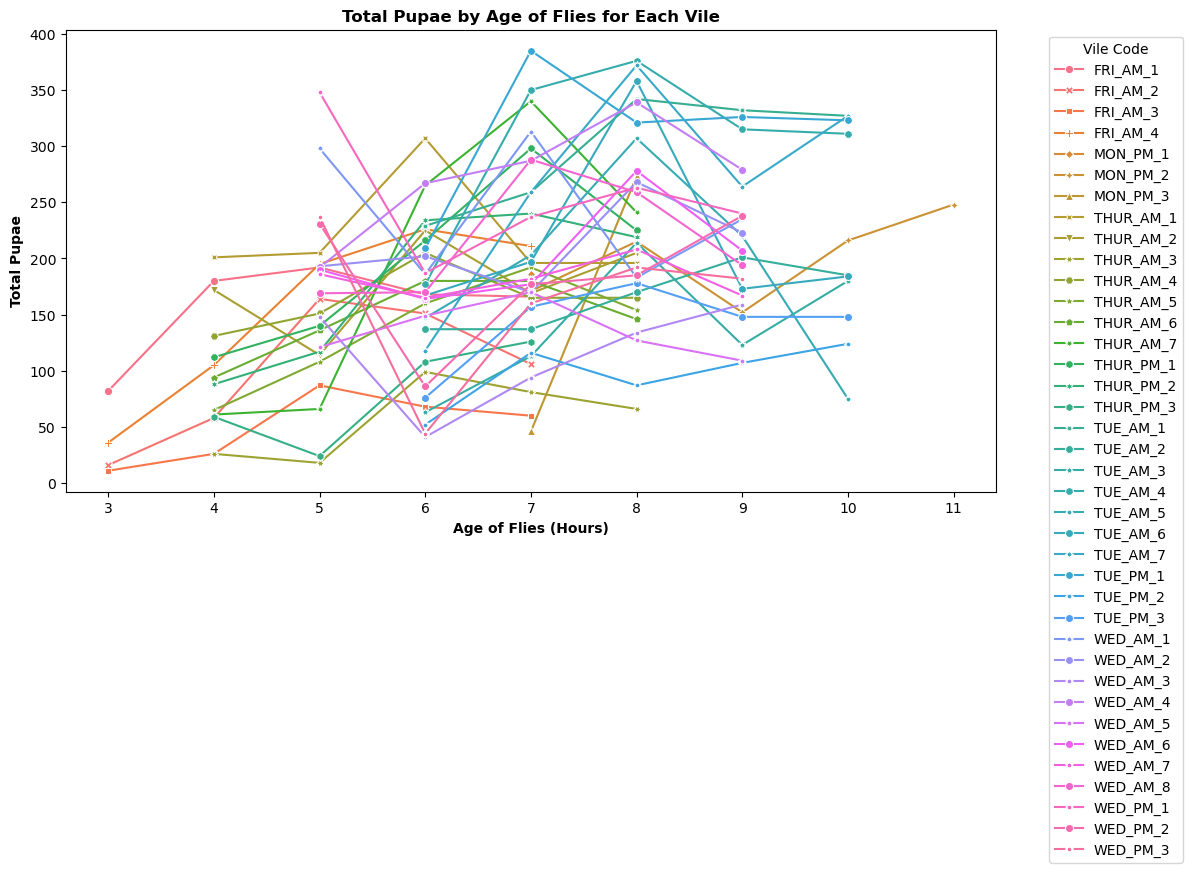

In [20]:
# chat gpt did this 

df_mb = df2.sort_values(by=['Vile_Code', 'Age of flies '])

# Now, create the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mb, x='Age of flies ', y='Total Pupae', hue='Vile_Code', style='Vile_Code', markers=True, dashes=False)

plt.title('Total Pupae by Age of Flies for Each Vile', fontweight='bold')
plt.xlabel('Age of Flies (Hours)', fontweight='bold')
plt.ylabel('Total Pupae', fontweight='bold')

# Adjust the legend
plt.legend(title='Vile Code', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()